<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/LINC_Pandas_Example_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas** 시작하기

### *학습목표*
1. 시리즈와 데이터프레임을 만들 수 있다
> 시리즈와 데이터프레임의 구성을 이해한다
2. pandas를 이용하여 csv 파일을 읽고 쓸 수 있다
> 자료는 CSV 또는 JSON 자료를 대상으로할 수 있다
3. 시리즈와 데이터프레임에서 원하는 데이터를 읽고 갱신할 수 있다
> pandas 함수 사용
4. 시리즈와 데이터프레임의 데이터를 조작할 수 있다
> pandas 함수 사용
5. 둘 이상의 데이터프레임을 하나로 통합하여 데이터프레임을 구성한다.
> pandas 함수 사용
6. 데이터를 그룹으로 나누어 분석한다
> pandas 함수 사용

* (실습) 주제
1. 을릉도의 기상 분석하기
2. ASOS 공공개방데이터 분석
3. Titanic 데이터셋 다루기  



---
* 정리

1. Pandas 특징
* 정형화된 데이터를 다루기에 적합함
* 시계열 또는 표 형식의 자료
* 엑셀 또는 SQL 테이블과 유사함

2.  Pandas에서 제공하는 2개의 자료구조인 시리즈(Series)과 데이터프레임(DataFrame)을 이해한다
* 1차원 시리즈, 2차원 데이터프레임

3. 구성된 데이터프레임의 자료 내용을 이해한다
* 데이터프레임 구성내용 이해
* 구성내용의 자료구성 이해

4. 자료를 그룹핑하여 분석한다

> pip install pandas

In [ ]:
import pandas as pd # pandas 패키지를 pd라는 이름으로 사용한다
import numpy as np


#### 시리즈 만들기
* 1차원 레이블이 지정된 배열 (값 + 인덱스)
> Series는 엑셀에서 한개 열(column)과 같는 1차원 리스트와 같은 구조임
* 열레이블을 인덱스라고 함
* 시리즈 생성방법
> 리스트로 만들기, 딕셔너리로 만들기, 튜플로 만들기

* 시리즈에 인덱스를 지정하지 않으면 인덱스는 0부터 시작하는 정수값이 됨

In [ ]:
# None NoneType으로 값이 존재하지 않음
# np.nan  Not a Number, 값이 없음

s = pd.Series([1,3, 5, np.nan, 6, 7])
s
print (type (s))
print (s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    7.0
dtype: float64


시리즈의 두번째 행을 얻어옴

In [ ]:
s[1]

3.0

시리즈의 첫번째 행을 얻어옴

In [ ]:
s[0]

1.0

시리즈의 첫번째, 두번째, 네번쨰 행을 얻어옴

In [ ]:
s [ [0, 1, 3]]

0    1.0
1    3.0
3    NaN
dtype: float64

시리즈의 값이 3보다 적은 행을 얻어옴

In [ ]:
s [ s < 3]

0    1.0
dtype: float64

슬라이싱을 사용하여 자료값을 얻어옴

In [ ]:
s [1:3]

1    3.0
2    5.0
dtype: float64

시리즈를 딕셔너리로 구성하여 키와 값을 얻어옴

In [ ]:
# 인덱스가 키 역할을 수행함
for k, v in s.items():
   print(f"{k} : {v}")

0 : 1.0
1 : 3.0
2 : 5.0
3 : nan
4 : 6.0
5 : 7.0


#### 데이터프레임 만들기
* Series가 엑셀에서 한개 줄을 말한다면 DataFrame은 표 형태의 값
> 행과 열 자료 구조임
* Series가 여러개 모이면 Dataframe이 구성됨

* 컬럼이름은 문자열 ABCD 의 개별 문자로 구성되며, 데이터프레임 구성식 columns의 값으로 사용됨

In [ ]:
columns=list("ABCD")
columns

['A', 'B', 'C', 'D']

In [ ]:
dates = pd.date_range("20211130", periods=6)
print (dates)


DatetimeIndex(['2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05'],
              dtype='datetime64[ns]', freq='D')


* 생성되는 데이터프레임은  6개 행과 4개의 열로 구성됨

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2021-11-30,-0.294160,-2.143310,0.267812,0.632209
2021-12-01,0.270557,0.936448,-0.262328,-1.244826
2021-12-02,0.193547,1.103775,0.123570,1.948707
2021-12-03,0.646170,0.333062,0.784630,-0.521299
2021-12-04,-1.828193,1.781211,-0.258316,-1.055502
2021-12-05,1.222826,-0.610791,-0.201215,-0.845033


In [ ]:
df.head(2)

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321


In [ ]:
df.tail()

,A,B,C,D
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-02,0.478842,-0.788118,0.578531,-0.015524
2021-12-03,-0.291293,-0.119256,-1.139245,1.103948
2021-12-04,-0.473765,0.867103,-0.226543,0.556426
2021-12-05,0.154920,-1.184895,0.979556,0.590628


In [ ]:
df.index

DatetimeIndex(['2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.values

array([[ 0.5187193 , -2.15204715, -1.3154274 , -0.58798009],
       [ 0.61531338, -1.42745233, -1.07096508,  1.64232107],
       [ 0.4788423 , -0.78811794,  0.57853125, -0.01552397],
       [-0.29129255, -0.1192559 , -1.13924465,  1.10394844],
       [-0.47376473,  0.86710268, -0.22654257,  0.55642586],
       [ 0.15492035, -1.18489467,  0.97955555,  0.59062842]])

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.167123,-0.800778,-0.365682,0.548303
std,0.456661,1.059495,0.971432,0.789495
min,-0.473765,-2.152047,-1.315427,-0.587980
25%,-0.179739,-1.366813,-1.122175,0.127463
50%,0.316881,-0.986506,-0.648754,0.573527
75%,0.508750,-0.286471,0.377263,0.975618
max,0.615313,0.867103,0.979556,1.642321


In [ ]:
df

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-02,0.478842,-0.788118,0.578531,-0.015524
2021-12-03,-0.291293,-0.119256,-1.139245,1.103948
2021-12-04,-0.473765,0.867103,-0.226543,0.556426
2021-12-05,0.154920,-1.184895,0.979556,0.590628


In [ ]:
df1 = df.sort_values(by="B")

In [ ]:
df1

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-05,0.154920,-1.184895,0.979556,0.590628
2021-12-02,0.478842,-0.788118,0.578531,-0.015524
2021-12-03,-0.291293,-0.119256,-1.139245,1.103948
2021-12-04,-0.473765,0.867103,-0.226543,0.556426


In [ ]:
df1 = df['A']

In [ ]:
df1

2021-11-30    0.518719
2021-12-01    0.615313
2021-12-02    0.478842
2021-12-03   -0.291293
2021-12-04   -0.473765
2021-12-05    0.154920
Freq: D, Name: A, dtype: float64

In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:
df[0:3]

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-02,0.478842,-0.788118,0.578531,-0.015524


In [ ]:
df1 = df["2021-11-30":"2021-12-02	"]

In [ ]:
df1

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-02,0.478842,-0.788118,0.578531,-0.015524


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
dates[0]

Timestamp('2021-11-30 00:00:00', freq='D')

loc : 라벨값 기반의 2차원 인덱싱
* df.loc[행 인덱싱값]
* df.loc[행 인덱싱값, 열 인덱싱값]

In [ ]:
df.loc[dates[0]]

A    0.518719
B   -2.152047
C   -1.315427
D   -0.587980
Name: 2021-11-30 00:00:00, dtype: float64

인덱스를 하나만 넣으면 행(row)을 선택

In [ ]:
df.loc ["2021-11-30"]

A   -0.294160
B   -2.143310
C    0.267812
D    0.632209
Name: 2021-11-30 00:00:00, dtype: float64

In [ ]:
df.loc["2021-11-30":"2021-12-02"]

,A,B,C,D
2021-11-30,-0.294160,-2.143310,0.267812,0.632209
2021-12-01,0.270557,0.936448,-0.262328,-1.244826
2021-12-02,0.193547,1.103775,0.123570,1.948707


In [ ]:
# ["A"] 컬럼을 얻어온후 새로운 자료구조를 구성함
df.loc[:, ["A"]]

,A
2021-11-30,0.518719
2021-12-01,0.615313
2021-12-02,0.478842
2021-12-03,-0.291293
2021-12-04,-0.473765
2021-12-05,0.154920


In [ ]:
df.loc[:, "A"]

2021-11-30    0.518719
2021-12-01    0.615313
2021-12-02    0.478842
2021-12-03   -0.291293
2021-12-04   -0.473765
2021-12-05    0.154920
Freq: D, Name: A, dtype: float64

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2021-11-30,0.518719,-2.152047
2021-12-01,0.615313,-1.427452
2021-12-02,0.478842,-0.788118
2021-12-03,-0.291293,-0.119256
2021-12-04,-0.473765,0.867103
2021-12-05,0.154920,-1.184895


In [ ]:
df.loc["2021-11-30":"2021-11-30", ["A", "B"]]

,A,B
2021-11-30,0.518719,-2.152047


iloc 인덱서: 순서를 나타내는 정수(integer) 인덱스

In [ ]:
df.iloc[0, 1]  # 첫번쨰 행의 두번쨰 열자료값

-2.1433096241456258

In [ ]:
df.iloc[3]

A   -0.291293
B   -0.119256
C   -1.139245
D    1.103948
Name: 2021-12-03 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2021-11-26,-1.661442,-0.746725
2021-11-27,-0.188760,0.296739


In [ ]:
df

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-02,0.478842,-0.788118,0.578531,-0.015524
2021-12-03,-0.291293,-0.119256,-1.139245,1.103948
2021-12-04,-0.473765,0.867103,-0.226543,0.556426
2021-12-05,0.154920,-1.184895,0.979556,0.590628


In [ ]:
df[ df['A'] > 0]

,A,B,C,D
2021-11-30,0.518719,-2.152047,-1.315427,-0.587980
2021-12-01,0.615313,-1.427452,-1.070965,1.642321
2021-12-02,0.478842,-0.788118,0.578531,-0.015524
2021-12-05,0.154920,-1.184895,0.979556,0.590628


In [ ]:
df[df >0]

,A,B,C,D
2021-11-30,0.518719,NaN,NaN,NaN
2021-12-01,0.615313,NaN,NaN,1.642321
2021-12-02,0.478842,NaN,0.578531,NaN
2021-12-03,NaN,NaN,NaN,1.103948
2021-12-04,NaN,0.867103,NaN,0.556426
2021-12-05,0.154920,NaN,0.979556,0.590628


## (실습) 시리즈 및 데이터프레임 사용하기

In [ ]:
list_data = ['Dog', 'Cat', 'Tiger']
idx = ['0', '1', '2']
series = pd.Series(list_data, index=idx)

In [ ]:
series.head(2)

0    Dog
1    Cat
dtype: object

In [ ]:
# 딕셔너리로 만들기
dict_data = { 'a': 1, 'b':2, "c":3}
series  = pd.Series(dict_data)

In [ ]:
type(series)

pandas.core.series.Series

In [ ]:
series

a    1
b    2
c    3
dtype: int64

In [ ]:
series.index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
series.values

array([1, 2, 3])

In [ ]:
# 튜플로 만들기
tup_data = ('홍길동', '20', '남')
series = pd.Series(tup_data, index=['name', 'age', 'sex'])
series

name    홍길동
age      20
sex       남
dtype: object

In [ ]:
series = pd.Series([1, 1, 3, 4, 5])
# 왼쪽에는 Series의 인덱스(index)를, 오른쪽은 값(value)를 제공한다
series

0    1
1    1
2    3
3    4
4    5
dtype: int64

In [ ]:
# values는 값을 출력함
series.values

array([1, 1, 3, 4, 5])

In [ ]:
# Index를 출력함
series.index

RangeIndex(start=0, stop=5, step=1)

* 특정값의 개수를 출력한다(빈도수를 얻기 위해 사용함)
> 특정속성값의 빈도를 구함

In [ ]:
series.value_counts()

1    2
5    1
4    1
3    1
dtype: int64

* Series 에서 특정값을 접근함

In [ ]:
# [  ] 안에 조건식을 사용할 수 이다
series[series > 2]

2    3
3    4
4    5
dtype: int64

In [ ]:
# 인덱스를 이용해 값을 제거할수도 있다
series = series.drop(0)
series

1    1
2    3
3    4
4    5
dtype: int64

In [ ]:
# append 함수를 이용하여 값을 추가할수도 있어요. 이때 값은 Series 형태의 값만 추가가 가능합니다
series = series.append(pd.Series([6, 7]))
series

0    1
1    1
2    3
3    4
4    5
0    6
1    7
dtype: int64

In [ ]:
# 값을 추가하니 인덱스 조정이 필요하며  reindex 함수를 통해 재정의할 수 있다
series = series.reset_index(drop=True)
series

0    1
1    1
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [ ]:
series[1]=100

In [ ]:
series

0      1
1    100
2      3
3      4
4      5
5      6
6      7
dtype: int64

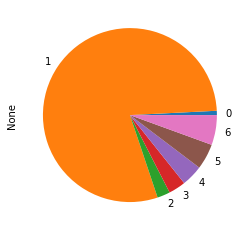

In [ ]:
import matplotlib.pyplot as plt
series.plot(kind='pie')
plt.show()

In [ ]:
# 시리즈 안에 조건식도 올 수 있어요
grades = [50, 60, 70, 80, 65]
grades = pd.Series(grades)

# 조건에 부합되는 자료로 시리즈 구성
pass_grades = grades[grades > 60]
pass_grades


2    70
3    80
4    65
dtype: int64

In [ ]:
# pass_grades 의 인텍스를 초기화 즉, 재설정
pass_grades.reset_index(drop=True, inplace=True)
pass_grades


0    70
1    80
2    65
dtype: int64

In [ ]:
# numpy 배열을 사용하여 데이터 프레임 생성

import numpy as np

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

# Use the `shape` property
print(df.shape)

# Or use the `len()` function with the `index` property
print(len(df.index))

(2, 3)
2


In [ ]:
df.head()

,0,1,2
0,1,2,3
1,4,5,6


In [ ]:
df.columns

RangeIndex(start=0, stop=3, step=1)

* 변수, 열, 컬럼, 피쳐, 특징으로 사용됨
* 관측치, 행, 로우, 데이터로 사용됨

In [ ]:
# DataFrame은 마치 사전과 같은 형태로 초기화한다
df = pd.DataFrame({'힘':[1, 2, 3], '지력':[-2 ,3 ,4], '마력': [2, 1, 0]})
df

,힘,지력,마력
0,1,-2,2
1,2,3,1
2,3,4,0


In [ ]:
df.head()

,힘,지력,마력
0,1,-2,2
1,2,3,1
2,3,4,0


In [ ]:
# 데이터프레임을 슬라이싱함
df[:2]

,힘,지력,마력
0,1,-2,2
1,2,3,1


행 데이터
* loc,  인덱스 기준으로 행 데이터 읽기
* iloc, 행 번호를 기준으로 행 데이터 읽기

In [ ]:
# 인덱스 0과 2의 행을 얻어옴
df.loc[[0,2]]

,힘,지력,마력
0,1,-2,2
2,3,4,0


In [ ]:
# 1에서 2행까지의 행을 얻어옴
df.iloc[1:3]

,힘,지력,마력
1,2,3,1
2,3,4,0


In [ ]:
# -1을 이용하여 마지막 행데이터를 추출함
df.iloc[-1]

힘     3
지력    4
마력    0
Name: 2, dtype: int64

In [ ]:
df.loc[[0,2], ['힘']]

,힘
0,1
2,3


In [ ]:
# 전체 데이터 중 힘 컬럼의 값이 1보다 큰 행을 얻어롬
df[df['힘'] >1]

,힘,지력,마력
1,2,3,1
2,3,4,0


In [ ]:
# axis를 0으로 설정하면 특정행(row)를 제거할 수 있다.
df.drop(0, axis=0)

,힘,지력,마력
1,2,3,1
2,3,4,0


In [ ]:
# axis를 1으로 설정하면 열(column)를 제거할 수 있다
df.drop("마력", axis=1)

,힘,지력
0,1,-2
1,2,3
2,3,4


#### 데이터 프레임 결합: concat () 함수
* 두개의 데이터프레임 df0와 df1 를 구성한다

In [ ]:
import pandas as pd
df0 = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})
df1 = pd.DataFrame({"c": [2, 3, 4], "d": [5, 6, 7]})

 * df0와 df1을 통합한다
> 통합과정에서 df1의 컬럼명을 c는 a로, d는 b로 변경한다.

In [ ]:
df = pd.concat([df0, df1.rename(columns={"c": "a", "d": "b"})])
df

,a,b
0,1,4
1,2,5
2,3,6
0,2,5
1,3,6
2,4,7


* df0와 df1을 일렬로 붙여서 통합한다

In [ ]:
df = pd.concat([df0, df1], axis=1)
df

,a,b,c,d
0,1,4,2,5
1,2,5,3,6
2,3,6,4,7


####  컬럼 단위로 두개의 데이터프레임을 결합 : combine() 함수

In [ ]:
def taking_larger_square(s1, s2):
     return s1 * s1 if s1.sum() > s2.sum() else s2 * s2

df0.combine(df1.rename(columns={"c": "a", "d": "b"}), taking_larger_square)

,a,b
0,4,25
1,9,36
2,16,49


#### 기존의 데이터프레임 이후 자료 붙이기 : append()

In [ ]:
df0.append(df1.rename(columns={"c": "a", "d": "b"}))

,a,b
0,1,4
1,2,5
2,3,6
0,2,5
1,3,6
2,4,7


In [ ]:
df0.append({"a": 1, "b": 2}, ignore_index=True)

,a,b
0,1,4
1,2,5
2,3,6
3,1,2


#### (실습) 데이터 프레임 사용하기
> pandas_tutorial_2021.ipynb

* 딕셔너리로 데이터프레임 생성하기


In [ ]:
import pandas as pd
d = {'name': ['Sam', 'Mike', 'Lisa'], 'items': [24, 44, 55]}
df = pd.DataFrame(data=d)
df

,name,items
0,Sam,24
1,Mike,44
2,Lisa,55


* 생성된 데이테프레임 사용하기

In [ ]:
# Counting Number Of Values
df['name'].value_counts()

Mike    1
Sam     1
Lisa    1
Name: name, dtype: int64

In [ ]:
# Querying Data
df.query('name == "Sam"')

,name,items
0,Sam,24


In [ ]:
df.query('items >= 20')


,name,items
0,Sam,24
1,Mike,44
2,Lisa,55


In [ ]:
# Combining Datasets
newd = {'name': ['Max', 'Nick', 'Sally'], 'items': [23, 45, 75]}
newdf = pd.DataFrame(data=newd)
fulldf = [df, newdf]
fulldf

combineddf = pd.concat(fulldf)
combineddf

,name,items
0,Sam,24
1,Mike,44
2,Lisa,55
0,Max,23
1,Nick,45
2,Sally,75


In [ ]:
df.groupby("name").count()

,items
name,
Lisa,1
Mike,1
Sam,1


* (실습) 딕셔너리로 데이터프레임 생성하여 사용하기


In [ ]:
# 딕셔너리를 사용하여 데이터 프레임 생성

import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

In [ ]:
# 첫번째 row의 값
print(df.loc[0])

calories    420
duration     50
Name: 0, dtype: int64


In [ ]:
# 첫번째와 두번쨰 row의 값
print(df.loc[[0, 1]])

   calories  duration
0       420        50
1       380        40


In [ ]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df = pd.DataFrame(data, columns=columns)
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [ ]:
# Use `loc[]` to select a column
print (df['도시'])

0    서울
1    서울
2    서울
3    부산
4    부산
5    부산
6    인천
7    인천
Name: 도시, dtype: object


In [ ]:
# 첫번쨰 row값
print(df.loc[0])

도시         서울
연도       2015
인구    9904312
지역        수도권
Name: 0, dtype: object


In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df)

      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [ ]:
print(df.loc["day2"])

calories    380
duration     40
Name: day2, dtype: int64


## 데이터 포멧팅

* group_name 를 정의하고 cut()을 사용하여 자료값을 3개의 값으로 구성
* 3개이 빈(bin)을 구성하여 분류하여 Level 컬럼에 추가
* 빈의 범위를 확인하기 위해 mybin 을 출력함


In [ ]:
import numpy as np
import pandas as pd

price = np.random.randint(100, size=8) * 10000 # price 값 생성
cars = pd.DataFrame(price, columns=['price'])

group_names = ["high", "middle", "low"]

cars ['Level'], mybin = pd.cut(cars['price'], 3, labels=group_names, retbins = True )

print (cars)

print (f'bins = {mybin}')


    price   Level
0  690000  middle
1  770000  middle
2  570000    high
3  900000     low
4  890000     low
5  390000    high
6  940000     low
7  970000     low
bins = [389420.         583333.33333333 776666.66666667 970000.        ]


카테고리 값을 수치 값으로 변환
* 기계학습에 적합한 데이터의 형태로 가공
* 가변수(dummy variable)를 사용하여 컬럼의 값을 컬럼으로 구성

In [ ]:
#numpy와 pandas를 임포트해준다.
import numpy as np
import pandas as pd
season = pd.DataFrame({'season':['spring', 'summer', 'fall', 'winter', np.nan]}) #마지막 부분은 결측값 처리 예시를 위한 Nan 값을 생성해준다.
season

,season
0,spring
1,summer
2,fall
3,winter
4,NaN


In [ ]:
pd.get_dummies(season['season'])


,fall,spring,summer,winter
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,0


#### 데이터 그룹핑하기 : groupby() 사용하기

* (목적) 집단, 그룹별로 데이터를 집계, 요약
* (기능) 전체 데이터를 그룹 별로 나누고 (split), 각 그룹별로 집계함수를 적용(apply) 한후, 그룹별 집계 결과를 하나로 결합(combine)

In [ ]:
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [ ]:
# groupby를 사용하여 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻음

df.groupby('city').mean()

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [ ]:
# 그룹 지정은 여러 필드를 사용하여 지정
# 도시(city)와 과일(fruits)로 평균
df.groupby(['city', 'fruits']).mean()

price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

In [ ]:
#groupby를 사용하면 기본으로 그룹 라벨이 index로 지정됨
#index를 사용하고 싶은 않은 경우에는 as_index=False 를 설정

df.groupby(['city', 'fruits'], as_index=False).mean()

,city,fruits,price,quantity
0,부산,apple,100.0,1.0
1,부산,banana,275.0,3.5
2,부산,orange,200.0,2.0
3,서울,apple,175.0,5.5
4,서울,banana,400.0,7.0


In [ ]:
# 그룹 안에 데이터를 확인
df.groupby('city').get_group('부산')


,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4


In [ ]:
df_g = df.groupby('city')
df_g

In [ ]:
# 각 그룹의 크기를 얻음
df.groupby('city').size()

city
부산    4
서울    3
dtype: int64

In [ ]:
# 그룹별로 결과를 얻는 통계값으로 통합함
cityDf = df.groupby('city').agg(np.mean)
cityDf

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [ ]:
#가격의 평균과 수량의 합계를 얻음
def my_mean(s):
    return np.mean(s)

df.groupby('city').agg({'price': my_mean, 'quantity': np.sum})

,price,quantity
city,,
부산,212.5,10
서울,250.0,18


In [ ]:
df.groupby(['city', 'fruits'], as_index=False).apply(lambda d: (d.price * d.quantity).sum())


,city,fruits,NaN
0,부산,apple,100
1,부산,banana,1950
2,부산,orange,400
3,서울,apple,1950
4,서울,banana,2800


In [ ]:
def total_series(d):
    return d.price * d.quantity

df.groupby(['city', 'fruits']).apply(total_series)

city  fruits   
부산    apple   0     100
      banana  2     750
              3    1200
      orange  1     400
서울    apple   4     750
              5    1200
      banana  6    2800
dtype: int64

In [ ]:
def total_keepindex(d):
    return pd.DataFrame({
        'total': d.price * d.quantity # 여기서 반환된 DataFrame row index와 d의 row index는 같음
})

df.groupby(['city', 'fruits']).apply(total_keepindex)

,total
0,100
1,400
2,750
3,1200
4,750
5,1200
6,2800


In [ ]:
def total_keepnoindex(d):
    return pd.DataFrame({
        'total': (d.price * d.quantity).sum()
    }, index=['hoge'])
df.groupby(['city', 'fruits']).apply(total_keepnoindex)

total
city fruits            
부산   apple  hoge    100
     banana hoge   1950
     orange hoge    400
서울   apple  hoge   1950
     banana hoge   2800

In [ ]:
df.to_csv('df_sample.csv')

#### (실습) 데이터 그룹핑하기
> weather_dokdo_islandipynb
* [을릉도 날씨 살펴보기](https://colab.research.google.com/drive/13N_JGYZXC3SMxIbKXnZs5f4xN4VGz_Qf)

> OpenAPI_ASOS_LINC_DA.ipynb
* [ASOS 공공개방데이터 살펴보기](https://colab.research.google.com/drive/1D00ivxaUqag9tnSi_GNoqdfVVgXwcOay)


#### 피봇 테이블(pivot table) 구성하기

* 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것
* 데이터 재구조화(reshaping data)를 위해 사용


In [ ]:
import pandas as pd

data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df = pd.DataFrame(data=data, columns=columns)
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


* 행 인덱스 인수로는 "도시", 열 인덱스 인수로는 "연도", 데이터 이름으로 "인구"로 지정

In [ ]:
df.pivot("도시", "연도", "인구")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


* set_index 명령과 unstack 명령을 사용해서 피봇데이블 구성

In [ ]:
df.set_index(["도시", "연도"])[["인구"]].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

* 다중 인덱스 피봇 테이블을 생성

In [ ]:
df.pivot(["지역", "도시"], "연도", "인구")

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

### 멜트
* 열을 행으로 변경하는 재구조화 과정
* 열은 내용은 행으로 구성됨

In [ ]:
pd.melt(df, id_vars=['연도'])

,연도,variable,value
0,2015,도시,서울
1,2010,도시,서울
2,2005,도시,서울
3,2015,도시,부산
4,2010,도시,부산
5,2005,도시,부산
6,2015,도시,인천
7,2010,도시,인천
8,2015,인구,9904312
9,2010,인구,9631482


In [ ]:
pd.melt(df, id_vars=['지역',  '연도', '인구'])

,지역,연도,인구,variable,value
0,수도권,2015,9904312,도시,서울
1,수도권,2010,9631482,도시,서울
2,수도권,2005,9762546,도시,서울
3,경상권,2015,3448737,도시,부산
4,경상권,2010,3393191,도시,부산
5,경상권,2005,3512547,도시,부산
6,수도권,2015,2890451,도시,인천
7,수도권,2010,263203,도시,인천


### 시계열 자료처리

#  Titanic 데이터셋 다루기
* Exploratory Data Analysis of The Titanic Data Set

* [타이타닉](https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89) 데이터셋(dataset) 의 자료를 읽어 분석을 수행한다
> 자료 https://www.kaggle.com/c/titanic

* 데이터분석을 통해 데이터가 갖는 특성을 파악함 (데이터 딕셔너리 내용확인)
1. Survived : 0 = 사망, 1 = 생존
2. SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
3. Parch : 타이타닉 호에 동승한 부모 / 자식의 수
4. Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴


* **(실습)** 데이터 딕셔너리 내용 확인
5. Pclass 가 표현하는 자료는 무엇인가


데이터 자료에서 결측치를 처리한다
> NaN 값이 있으며, NaN은 Not a Number를 의미

데이터 분석을 위해 train 데이터셋만을 사용하여 자료의 내용을 이해하는 것을 목적으로 한다
* 분석을 통해 예측모델 개발에 활용할 수 있음

>  test 데이터셋과 train 데이터셋의 특징을 비교

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* seaborn 라이브러리 사용 Titanic 데이터셋 읽기
```
titanic_df = sns.load_dataset('titanic')
```

In [ ]:
url = 'https://raw.githubusercontent.com/iceman67/DataAnalysis/master/train.csv'

In [ ]:
# 자료읽기
titanic_df = pd.read_csv(url)

In [ ]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moor, Master. Meier",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* 성별 자료 분석

In [ ]:
len (titanic_df['Sex'].unique())

2

In [ ]:
titanic_df['Sex'].count()

891

* (예) 데이터분석 예시

In [ ]:
data = titanic_df.groupby('Sex')['Survived'].sum()
data

Sex
female    233
male      109
Name: Survived, dtype: int64

* filter function allows us to drop data based on group property

In [ ]:
titanic_df.groupby('Survived').transform(lambda x: x - x.mean())


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-446.016393,0.468124,-8.626179,0.446266,-0.329690,-14.867887
1,-442.368421,-0.950292,9.656310,0.526316,-0.464912,22.887892
2,-441.368421,1.049708,-2.343690,-0.473684,-0.464912,-40.470408
3,-440.368421,-0.950292,6.656310,0.526316,-0.464912,4.704592
4,-442.016393,0.468124,4.373821,-0.553734,-0.329690,-14.067887
...,...,...,...,...,...,...
886,439.983607,-0.531876,-3.626179,-0.553734,-0.329690,-9.117887
887,443.631579,-0.950292,-9.343690,-0.473684,-0.464912,-18.395408
888,441.983607,0.468124,NaN,0.446266,1.670310,1.332113
889,445.631579,-0.950292,-2.343690,-0.473684,-0.464912,-18.395408


In [ ]:
def func(x):
    x['Fare'] = x['Fare'] / x['Fare'].sum()
    return x
titanic_df.groupby('Survived').apply(func)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.000597,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.004307,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.000479,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.003208,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.000663,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0.001071,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,0.001813,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0.001931,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,0.001813,C148,C


In [ ]:
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic_df.groupby('Survived').filter(lambda x: x['Fare'].std() > 50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


* 데이터 앞, 뒤의 일부분만 보여준다. 보여줄 행의 수는 display.max_rows 옵션으로 정할 수 있음

In [ ]:
pd.set_option("display.max_rows", 20)  # 앞뒤로 모두 20행만 보여준다.
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

#### 데이터 보기 (데이터 딕셔너리 참고)

* **Pclass** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **SibSp** Number of Siblings/Spouses Aboard
* **Parch** Number of Parents/Children Aboard
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

* CSV 를 Excel 자료로 저장후 읽기 수행

In [ ]:
titanic_df = pd.read_excel("titanic.xlsx", sheet_name="passengers")

In [ ]:
# 기본정보를 확인하기 위해 info() 함수를 사용함
# 전체 열의 갯수는 12개이면 전체 샘플은 891개임
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 결측치를 갖는 컬럼은 무엇인지 찾으시오

In [ ]:
# 정수형 자료는 int64, 실수형 자료는 float64, 객체 자료형은 object 로 표현됨

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# describe(), unique(), value_counts()를 사용하여 수치형 자료에 대한 기술통계를 구할 수 있음

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* describe() 결과 회전해서 살펴보기

In [ ]:
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# 전체 데이터 셋의 크기 = 891
titanic_df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
titanic_df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [ ]:
titanic_df.values[0]

array([1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0,
       'A/5 21171', 7.25, nan, 'S'], dtype=object)

In [ ]:
# 마지막 5개 행, titanic_df.tail()과 같은 결과가 출력됨
titanic_df.iloc[-6:-1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


In [ ]:
# 특정 컬럼가 얻기
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## (데이터분석) 사례
* 타이타닉호에 탑승한 승객의 평균 나이를 구한다

In [ ]:
titanic_df['Age'].mean()

29.69911764705882

* 타이타닉호에 탐승한 승객의 나이가 탐승 승객의 평균나이보다 5이상 차이가 나는 경우  1을 그렇지 않은 경우 0을 설정함
> numpy의 where 를 사용

In [ ]:
import numpy as np
titanic_df["ageType"] = np.where( np.abs(titanic_df['Age'] -  titanic_df['Age'].mean()) > 5, 1, 0)


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
titanic_df["ageType"].sum()

513

전체 생존률은 살펴보기
* value_counts()를 사용하여 카테고리 값을 누적하여 자료를 집계함

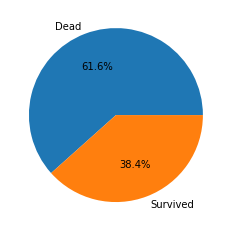

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(titanic_df["Survived"].value_counts(), labels=["Dead","Survived"], autopct='%.1f%%')
plt.show()

0    549
1    342
Name: Survived, dtype: int64


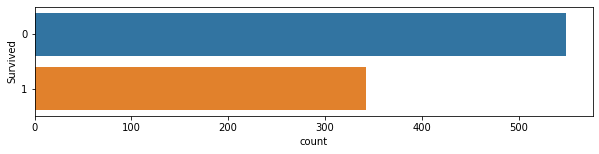

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=titanic_df)

print(titanic_df.Survived.value_counts())


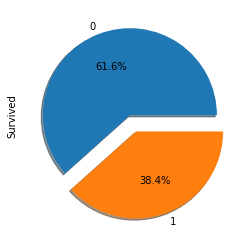

In [ ]:
titanic_df["Survived"].value_counts().plot.pie( explode=[0,0.2], autopct='%1.1f%%', shadow=True)
plt.show()

Survived 열을  분석해본 결과 61.6%가 사망하고 38.4%만 생존 했음

* 객실등급에 따른 생존 및 사망 정보을 추출함
> 선실 (1,2,3) 의 생존자 수 구하기


In [ ]:
# 특정조건을 갖는 데이터프레임을 구성함
survived = titanic_df[titanic_df['Survived'] == 1]
survived['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [ ]:
survived = titanic_df[titanic_df['Survived'] == 1]['Pclass'].value_counts()
dead = titanic_df[titanic_df['Survived'] == 0]['Pclass'].value_counts()

In [ ]:
dead.head()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [ ]:
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,1,2,3
Survived,136,87,119
Dead,80,97,372


1등실 선실의 생존자가 가장 많음, 3등실 선실의 생존자가 2번쨰로 많음

* 객실등급에 따른 생존 및 사망 정보을 추출함
> 선실 (1,2,3) 의 생존율 구하기


In [ ]:
titanic_df.groupby('Pclass')["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
group_class = titanic_df.groupby('Pclass')["Survived"].mean()

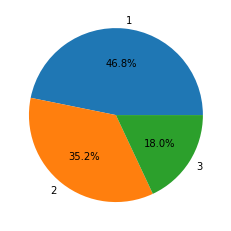

In [ ]:
plt.pie(group_class, labels=["1","2", "3"], autopct='%.1f%%')
plt.show()

* 1등실의 생존율이 가장 높음을 확인할 수 있음

In [ ]:
# groupby 로 자료 그룹핑하기
print(titanic_df.groupby(['Sex', 'Pclass']).mean()['Survived'])
print(titanic_df.groupby(['Sex', 'Pclass']).std()['Survived'])

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.176716
        2         0.271448
        3         0.501745
male    1         0.484484
        2         0.365882
        3         0.342694
Name: Survived, dtype: float64


* 여성인 경우 1등급일때 생존 확률이 96.80% 2등급인 경우 92.10% 3등급인 경우 50%
* 남성인 경우 1등급일때 생존 확률이 37% 2등급인 경우 16% 3등급인 경우 14%
* 등급이 낮을 수록 생존율 저하

Pclass와 Survived 을 그룹핑한 후 Survived 값을 0과 1로 집계함
* sum()를 사용하는 경우 사망자의 자료 집계를 할 수 없음
```
titanic_df.groupby(['Pclass','Survived'])['Survived'].sum()
```

In [ ]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].sum()

Pclass  Survived
1       0             0
        1           136
2       0             0
        1            87
3       0             0
        1           119
Name: Survived, dtype: int64

In [ ]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

* Age 와 Survived 컬럼 자료, 오류를 해결하시오 (여러컬럼 지정)

In [ ]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
titanic_df[['Age', 'Survived']]
#titanic_df['Age', 'Survived']

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [ ]:
# 요금을 기준으로 행을 정렬함, 가장 비싼 요금을 지급한 승객정보를 얻고자함
titanic_df.sort_values(by=['Fare'], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [ ]:
# 요금을 기준으로 내림 차순으로 정렬함
titanic_df.sort_values(by=['Fare'], axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [ ]:
# 열을 중심으로 정렬함 (알파벳순서에서  Age가 처음에 위치함)
titanic_df.sort_index(axis=1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369


#### 결측치 다루기
* 891 개 행 중 나이(Age)에 177개의 결측치, 객실번호(Cabin)에 687개 결측치, 탑승항구(Embarked)에 2개의 결측치가 있음
* 결측치 확인, 결측치 대체/제거를 통해 데이터 클린징 수행

* 결측치 시각화로 확인하기

In [ ]:
# 자료에 값이 없는 컬럼은 무엇인가
titanic_df.count() # 컬럼의 데이터 개수 확인

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

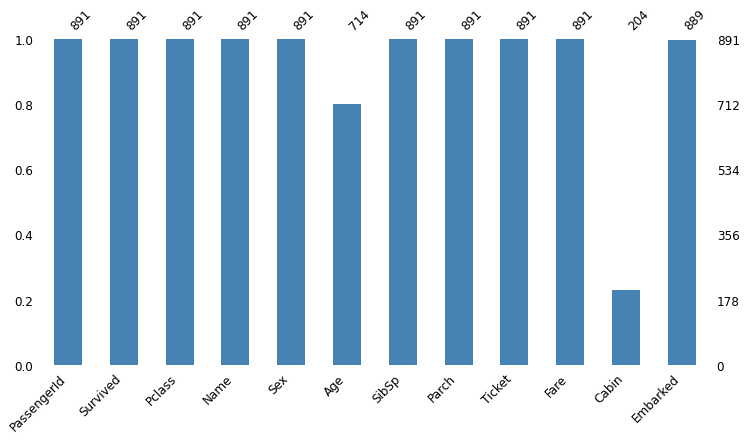

In [ ]:
import missingno as msno
msno.bar(titanic_df, figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()

In [ ]:
titanic_df.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object')]

In [ ]:
titanic_df.isnull().mean() # 결측치를 백분율로 확인

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

결측치 제거
> 결측값이 많은 컬럼은 제외함 (기준 50%)

In [ ]:
titanic_df = titanic_df.dropna(thresh=int(len(titanic_df)*0.5), axis =1)

In [ ]:
titanic_df.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

* Age 결측치를 중간값으로 보정함

In [ ]:
titanic_df['Age'].median() # mean() 을 사용 평균값으로 대치할 수 있음

28.0

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

> Embarked의 결측치를  최다 빈도값으로 대치

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### (실습) 나이 분포 및 결측치 처리
> https://github.com/Lawrence-Krukrubo/EDA/blob/master/rms_titanic_eda.ipynb

In [ ]:
x = titanic_df.Age.copy(deep=True)

In [ ]:
x.dropna(axis=0, inplace=True)

len(x)

714

In [ ]:
count, bin_edges = np.histogram(x, bins=10, range=(0,100))
print('count is',count,'\nBin edges are:',bin_edges)

count is [ 62 102 220 167  89  48  19   6   1   0] 
Bin edges are: [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


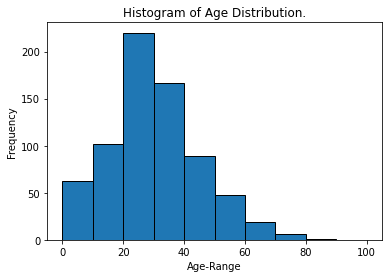

In [ ]:
plt.hist(x, bins=bin_edges, edgecolor='black')
plt.title('Histogram of Age Distribution.')
plt.xlabel('Age-Range')
plt.ylabel('Frequency')
plt
plt.show()


In [ ]:
mode_age = (x.mode())[0]
mean_age = x.mean()
median_age = x.median()

print('Mean age is',mean_age)
print('Median age is',median_age)
print('Mode age is',mode_age)

Mean age is 29.69911764705882
Median age is 28.0
Mode age is 24.0


* 결측자료 처리하기

In [ ]:
def rand_age(x):
    """ Takes a value x, and returns the float form of x.
    If x gives an error, then return either the mode, median or mean age"""
    try:
        int(x)
        return float(x)
    except:
        i = [mean_age, mode_age, median_age]
        y = np.random.randint(0, len(i))

    return i[y]

In [ ]:
titanic_df.Age = titanic_df.Age.apply(rand_age)

titanic_df['Age']

NameError: ignored

In [ ]:
titanic_df.Age.isna().any()

False

(**실습**)데이터프레임의 처음 7개 행을 얻어온다

In [ ]:
titanic_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [ ]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Sibsp 형재자매/배우자 수
# Parch 부모/자녀 수
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

(**실습**) 열이름 Embarked 의 자료값의 의미를 설명하시오

In [ ]:
titanic_df.shape

(891, 11)

In [ ]:
# 데이터에 대한 기본정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


describe()를 사용하여 전체 승객의 생존율은 구해본다
> Survived의 1은 생존, 0은 사망

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ageType
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.575758
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.494505
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# 최고령 승선자의 나이는
titanic_df['Age'].max()

80.0

 > 승객 ID 인 PassengerID 를 인텍스로 지정하여 자료를 읽어 데이터프레임을 구성한다

In [ ]:
titanic_df = pd.read_csv(url, index_col='PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
value_counts = titanic_df['Pclass'].value_counts()
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# index 단위로 정렬하여 보여주기
titanic_df['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

인덱싱을 통해 시리즈(Series)로 추출함

In [ ]:
print(type(value_counts))

<class 'pandas.core.series.Series'>


1등, 2등, 3등석 승객수
print(value_counts)

Embarked (승선지)

In [ ]:
titanic_df[["Embarked", "Sex"]].nunique()

Embarked    3
Sex         2
dtype: int64

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
titanic_df["Embarked"] = titanic_df["Embarked"].astype("category")
titanic_df["Embarked"].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [ ]:
# 새로 생성된 'Age_0' 열의 모든 값은 0 으로 채워진다
titanic_df['Age_0'] = 0

In [ ]:
# Age_0 컬럼의 내용을 확인함
titanic_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


전체 샘플수 891중 생존재는 342명이고 사망자는 549명이다

In [ ]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

남자승객의 생존율은 18.9%, 여자승객의 생존율은  74.2 % 임을 확인할 수 있다

In [ ]:
titanic_df['Survived'][titanic_df['Sex'] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [ ]:
titanic_df['Survived'][titanic_df['Sex'] == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

* 특정 조건을 갖는 승객정보를 추출하여 데이터프레임으루 구성함
> 35세 이상 승객

In [ ]:
above_35 = titanic_df[titanic_df["Age"] >= 35]

In [ ]:
above_35.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [ ]:
type(above_35)

pandas.core.frame.DataFrame

In [ ]:
above_35.shape

(235, 12)

> 2등 및 3등칸 승객

In [ ]:
class_23 = titanic_df[(titanic_df["Pclass"] == 2) | (titanic_df["Pclass"] == 3)]

* 2등 및 3등 칸의 승객이 1등칸의 승객보다 나이가 적음을 확인함

In [ ]:
class_23["Age"].mean()

26.692708333333332

In [ ]:
titanic_df["Age"].mean()

29.69911764705882

* 나이와 요금의 중간값을 구함

In [ ]:
titanic_df[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [ ]:
titanic_df[titanic_df["Name"].str.contains("Countess")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
PassengerId,,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,0


In [ ]:
titanic_df["Sex_short"] = titanic_df["Sex"].replace({"male": "M", "female": "F"})

In [ ]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Sex_short
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,F
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,F
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,F
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,M


### 자료 시각화하기

Text(0.5, 1.0, 'Survived (Female)')

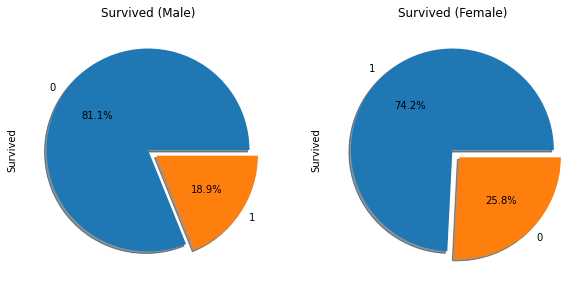

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2, figsize= (10,5))
titanic_df['Survived'][titanic_df['Sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic_df['Survived'][titanic_df['Sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')



* 객실 등급별 생존자수를 seaborn 패키지를 사용하여 차트로  출력하기
> countplot() 함수를 사용한다
* 객실 등급 카테고리별 생존자수를 계산해 차트로 나타낸다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


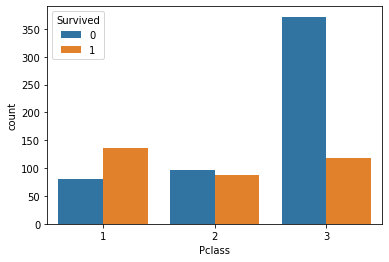

In [ ]:
import seaborn as sns
sns.countplot('Pclass', hue='Survived', data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


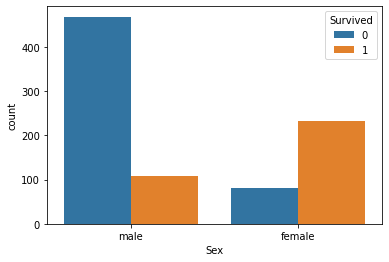

In [ ]:
 sns.countplot('Sex',  hue='Survived', data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


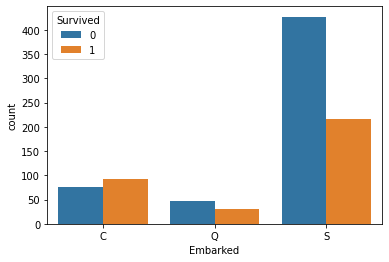

In [ ]:
sns.countplot('Embarked',  hue='Survived', data=titanic_df)

## (실습) 타이타닉데이터 자료분석하기

In [ ]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)

In [ ]:
titanic_drop_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_short
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,F
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,F
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


In [ ]:
titanic_df = pd.read_csv(url)

In [ ]:
indexes = titanic_df.index

In [ ]:
print (indexes)

RangeIndex(start=0, stop=891, step=1)


In [ ]:
indexes.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
indexes[:5].values

array([0, 1, 2, 3, 4])

In [ ]:
titanic_sorted = titanic_df.sort_values(by = ['Name'])

In [ ]:
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [ ]:
titanic_sorted = titanic_df.sort_values(by = ['Pclass','Name'])

In [ ]:
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [ ]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### 특정 컬럼의 자료값의 특징을 이해한다

In [ ]:
titanic_df[ ['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [ ]:
titanic_df[ ['Age', 'Fare']].max()

Age      80.0000
Fare    512.3292
dtype: float64

In [ ]:
titanic_df[ ['Age', 'Fare']].min()

Age     0.42
Fare    0.00
dtype: float64

자료값의 내용을 추출하여 새로운 컬럼을 생성한다

In [ ]:
titanic_df['Embarked(Humanized)'] = titanic_df['Embarked'].replace('C', 'Cherbourg').replace('S', 'Southhampton').replace('Q', 'Queenstown')

In [ ]:
titanic_df.iloc[1:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton


In [ ]:
titanic_df.loc[1:3, ['Name', 'Sex']]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


####  선실별 자료 분석 groupby()
특정열에 대해 그룹객체를 생성한 후, 자료를  집계하기 위해 사용

In [ ]:
titanic_df["Pclass"].unique()

array([3, 1, 2])

In [ ]:
# Let's group Pclasss by size and cast to a Data Frame
classes = titanic_df.groupby('Pclass').size().to_frame()

# Let's rename the column
classes.rename(columns={0:'total'}, inplace=True)

# Let's customize the index
classes.index = ['1st Class','2nd Class','3rd Class']

# and display the result
classes


,total
1st Class,216
2nd Class,184
3rd Class,491


In [ ]:
class_group = titanic_df.groupby('Pclass')

In [ ]:
class_group = titanic_df.groupby('Pclass')['Sex'].describe()
class_group

,count,unique,top,freq
Pclass,,,,
1,216,2,male,122
2,184,2,male,108
3,491,2,male,347


선실등급(PClass)을 기준으로 요금(Fare)의 평균을 집계함

In [ ]:
class_group = titanic_df.groupby('Pclass')['Fare'].mean()
class_group

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

선실등급(PClass)을 기준으로 요금(Fare)의 표준편차를 집계함

In [ ]:
class_group = titanic_df.groupby('Pclass')['Fare'].std()
class_group

Pclass
1    78.380373
2    13.417399
3    11.778142
Name: Fare, dtype: float64

In [ ]:
class_group = titanic_df.groupby('Pclass')['Fare'].agg(['mean', 'std'])
class_group

,mean,std
Pclass,,
1,84.154687,78.380373
2,20.662183,13.417399
3,13.675550,11.778142


In [ ]:
class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [ ]:
class_group.size()

Pclass
1    216
2    184
3    491
dtype: int64

In [ ]:
class_group.ngroups

3

Get Groups

In [ ]:
class_group.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Get First, Last or Nth

In [ ]:
# First Row of each group
class_group.first()
# Last Row of each group
class_group.last()
# 2nd Row of each group
class_group.nth(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
2,16,1,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S
3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


To get the highest fare by Pclass

In [ ]:
# Sort and get the first value of each group
titanic_df.sort_values(by='Fare', ascending=False).groupby('Pclass').first()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B101,C
2,656,0,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,F4,S
3,864,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,F E69,S


Pclass열에 대해 그룹객체를 생성한 후, 평균(mean)으로 집계

In [ ]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Pclass, Sex열에 대해 그룹객체를 생성한 후, 평균(mean)으로 집계

In [ ]:
class_and_gender_group = titanic_df.groupby(['Pclass', 'Sex'])

In [ ]:
class_and_gender_group.groups

{(1, 'female'): [1, 3, 11, 31, 52, 61, 88, 136, 151, 166, 177, 194, 195, 215, 218, 230, 256, 257, 258, 268, 269, 275, 290, 291, 297, 299, 306, 307, 309, 310, 311, 318, 319, 325, 329, 334, 337, 341, 356, 366, 369, 375, 380, 383, 393, 412, 435, 457, 486, 496, 498, 504, 513, 520, 523, 537, 539, 540, 556, 558, 571, 577, 581, 585, 591, 609, 627, 641, 669, 689, 700, 708, 710, 716, 730, 742, 759, 763, 765, 779, 781, 796, 809, 820, 829, 835, 842, 849, 853, 856, 862, 871, 879, 887], (1, 'male'): [6, 23, 27, 30, 34, 35, 54, 55, 62, 64, 83, 92, 96, 97, 102, 110, 118, 124, 137, 139, 155, 168, 170, 174, 185, 187, 209, 224, 245, 248, 252, 262, 263, 270, 273, 284, 295, 298, 305, 331, 332, 336, 339, 351, 370, 373, 377, 390, 430, 434, 438, 445, 447, 449, 452, 453, 456, 460, 462, 467, 475, 484, 487, 492, 493, 505, 507, 512, 515, 527, 536, 544, 545, 550, 555, 557, 572, 583, 587, 599, 602, 604, 607, 621, 625, 630, 632, 633, 645, 647, 659, 660, 662, 671, 679, 681, 690, 694, 698, 701, ...], (2, 'female'): [

In [ ]:
titanic_df.groupby(['Pclass', 'Sex'], as_index=False).mean()

,Pclass,Sex,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,female,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
1,1,male,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
2,2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
3,2,male,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
4,3,female,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
5,3,male,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


In [ ]:
titanic_df.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       male     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

Pclass, Sex열에 대해 그룹객체를 생성한 후, Age 열 평균(mean)으로 집계

In [ ]:
part_df = titanic_df[['Pclass', 'Sex', 'Age']]
part_df.groupby(['Pclass', 'Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [ ]:
part_df.groupby(['Pclass', 'Sex'], as_index=False).max()

,Pclass,Sex,Age
0,1,female,63.0
1,1,male,80.0
2,2,female,57.0
3,2,male,70.0
4,3,female,63.0
5,3,male,74.0


In [ ]:
part_df = titanic_df[['Pclass', 'Sex', 'Survived']]
part_df.groupby(['Pclass', 'Sex'], as_index=False).mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [ ]:
titanic_df.set_index(['Pclass', 'Sex'])

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
titanic_df.set_index(['Pclass', 'Sex']).reset_index()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


In [ ]:
pclass_and_sex_group = titanic_df.set_index(['Pclass', 'Sex']).groupby(level=[0,1])

In [ ]:
pclass_and_sex_group.mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       male     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

In [ ]:
pclass_and_sex_group = titanic_df.set_index(['Pclass', 'Sex']).groupby(level=[1,0])
pclass_and_sex_group.mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                                  
female 1        469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       2        443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       3        399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
       2        447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
       3        455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

In [ ]:
import numpy as np
pclass_and_sex_group = titanic_df.set_index(['Pclass', 'Sex']).groupby(level=[0,1])
pclass_and_sex_group.agg([np.mean, np.sum, np.max])

PassengerId               ...        Fare                     
                     mean     sum amax  ...        mean        sum      amax
Pclass Sex                              ...                                 
1      female  469.212766   44106  888  ...  106.125798  9975.8250  512.3292
       male    455.729508   55599  890  ...   67.226127  8201.5875  512.3292
2      female  443.105263   33676  881  ...   21.970121  1669.7292   65.0000
       male    447.962963   48380  887  ...   19.741782  2132.1125   73.5000
3      female  399.729167   57561  889  ...   16.118810  2321.1086   69.5500
       male    455.515850  158064  891  ...   12.661633  4393.5865   69.5500

[6 rows x 18 columns]

#### groupby() 을 통한 데이터 분석 결론 도출
* 좌석별 등급(1,2,3등석)을 기준으로 생존율을 구하고자한다
> df.groupby(['Pclass', 'Survived']).mean()


* 사망자의 나이는 생존자의 나이보다 많다
(생존율과 나이는 상관관계가 있음)

* 1등석의 경우 생존자의 객실가격이 높습니다. (여성 생존율이 높음)

* 가족과 동반탑승한 사람의 생존율이 높았다. (여성 생존율이 높음)

In [ ]:
 titanic_df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

#### 상관관계 찾아보기
* https://makeschool.org/mediabook/oa/tutorials/titanic-dataset-tutorial-an-intro-to-data-analysis-and-statistics-n40/correlation/

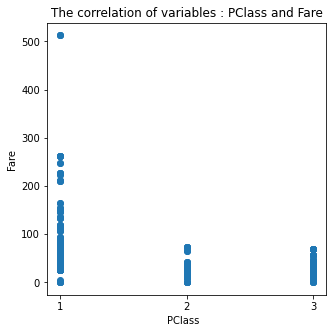

In [ ]:
# Create figure and axis objects

fig, ax = plt.subplots(figsize=(5,5))
plt.xticks(np.arange(1, 4, 1))
# Create the scatterplot
ax.plot(titanic_df['Pclass'],
        titanic_df['Fare'],
        marker='o', # plot as dots
        linestyle='') # remove line

# Labeling
ax.set(title='The correlation of variables : PClass and Fare',
      xlabel='PClass  ', ylabel='Fare')

plt.show();

* 상관계수 이해하기
```
값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계
값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계
값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계
```


In [ ]:
titanic_df['Pclass'].corr(titanic_df['Fare'])

-0.5494996199439074

In [ ]:
titanic_df['Survived'].corr(titanic_df['Age'])
#=> -0.07722109457217768
#=> -7.72%

-0.07722109457217768

In [ ]:
titanic_df['Sex'].str.get_dummies().corrwith(titanic_df['Survived']/titanic_df['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

In [ ]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


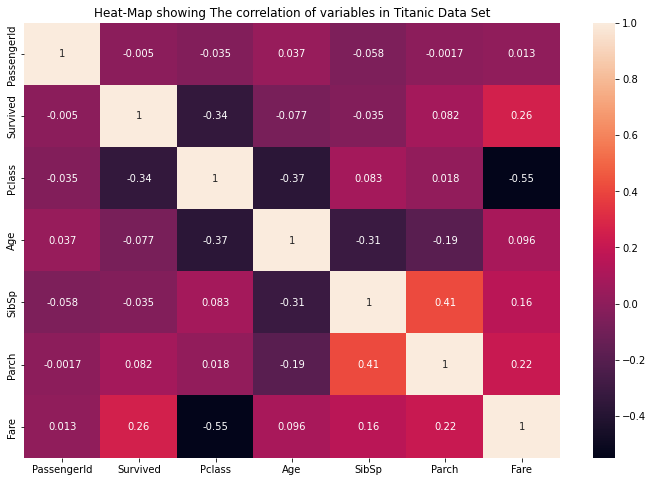

In [ ]:
import seaborn as sns

corr_data= titanic_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_data, annot=True)
plt.title('Heat-Map showing The correlation of variables in Titanic Data Set')

plt.show()

#### pivot_table 자료 재구조화

* Pclass열의 3가지 그룹, 열에는 Sex열의 2가지그룹, 값에는 Age열을 평균값(mean)으로 집계

In [ ]:
pdf1 = pd.pivot_table(titanic_df,                # 피벗할 데이터프레임
                     index = 'Pclass',    # 행 위치에 들어갈 열
                     columns = 'Sex',    # 열 위치에 들어갈 열
                     values = 'Age',     # 데이터로 사용할 열
                     aggfunc = ['mean'])   # 데이터 집계함수

In [ ]:
pdf1

mean           
Sex        female       male
Pclass                      
1       34.611765  41.281386
2       28.722973  30.740707
3       21.750000  26.507589

> 행에는 Pclass열의 3가지 그룹, 열에는 Sex열의 2가지그룹, 값에는 Survived열을 평균값(mean)과 합(sum)으로 집계한 값이 들어간 것을 확인할 수 있다.

In [ ]:
pdf2 = pd.pivot_table(titanic_df,                # 피벗할 데이터프레임
                     index = 'Pclass',    # 행 위치에 들어갈 열
                     columns = 'Sex',    # 열 위치에 들어갈 열
                     values = 'Survived',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수

In [ ]:
pdf2

mean              sum     
Sex       female      male female male
Pclass                                
1       0.968085  0.368852     91   45
2       0.921053  0.157407     70   17
3       0.500000  0.135447     72   47

In [ ]:
pdf3 = pd.pivot_table(titanic_df,
                     index = ['Pclass','Sex'],
                     columns = 'Survived',
                     values = ['Age','Fare'],
                     aggfunc = ['mean','max'])
pdf3

mean                         ...   max                  
                     Age                   Fare  ...   Age    Fare          
Survived               0          1           0  ...     1       0         1
Pclass Sex                                       ...                        
1      female  25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292
       male    44.581967  36.248000   62.894910  ...  80.0  263.00  512.3292
2      female  36.000000  28.080882   18.250000  ...  55.0   26.00   65.0000
       male    33.369048  16.022000   19.488965  ...  62.0   73.50   39.0000
3      female  23.818182  19.329787   19.773093  ...  63.0   69.55   31.3875
       male    27.255814  22.274211   12.204469  ...  45.0   69.55   56.4958

[6 rows x 8 columns]

#### (실습) titanic 데이터셋 분석

In [ ]:
# Load library
import pandas as pd
# Create URL
url = 'https://raw.githubusercontent.com/iceman67/DataAnalysis/master/train.csv'
# Load data
dataframe = pd.read_csv(url)
# Show two rows
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Select first row
dataframe.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [ ]:
# Select three rows
dataframe.iloc[1:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Survived 컬럼의 평균값으로 생존률을 계산한다

In [ ]:
import numpy as np

# 생존률
survivied_rate = np.average(dataframe['Survived'])
print (f"생존율 = {round(survivied_rate,2)}")

생존율 = 0.38


3등실의 행을 별도의 데이터프레임 pclass3로 구성함
* 조건을 Pclass 가 3과 같은것으로 지정함

In [ ]:
pclass3 = dataframe[ dataframe.Pclass == 3]
pclass3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


구성된 pclass3의 생존율을 구함

In [ ]:
survivied_rate = np.average(pclass3['Survived'])
print (f" 3등칸 생존율 = {round(survivied_rate,2)}")

 3등칸 생존율 = 0.24


1 등칸 생존율과 평균 생존율을 비교한다.

In [ ]:
pclass1 = dataframe[ dataframe['Pclass'] == 1]
survivied_rate = np.average(pclass1['Survived'])
print (f" 1등칸 생존율 = {round(survivied_rate,2)}")

 1등칸 생존율 = 0.63


In [ ]:
dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 60)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [ ]:
# Calculate statistics
print('Maximum:', dataframe['Age'].max())
print('Minimum:', dataframe['Age'].min())
print('Mean:', dataframe['Age'].mean())
print('Sum:', dataframe['Age'].sum())
print('Count:', dataframe['Age'].count())

Maximum: 80.0
Minimum: 0.42
Mean: 29.69911764705882
Sum: 21205.17
Count: 714


In [ ]:
dataframe['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
dataframe[dataframe['Age'].isnull()].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
